# Distribution for authors with at least 28 publications
#### (so  4607 authors, the 1.98% of the total data)
#### -> fitting Power law, Power law with exponential cut off and exponential 

In [10]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit # The module that contains the curve_fit routine

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.rawData_queries import *
from myLibraries.events import *
from myLibraries.theoretical_functions import *
from myLibraries.utils import *

In [11]:
HOLE_SIZE = 28
ACTIVITY = 0
MIN_PUBS = 28

In [12]:
df  =get_all_collabs()

df = df[df["2018"] != 0]
df = df[df["max_hole_size"] <= HOLE_SIZE]
df = df[df["activity"] >= ACTIVITY]
df = df[df["tot_pubs"] >= MIN_PUBS]

colls = df["2018"].values

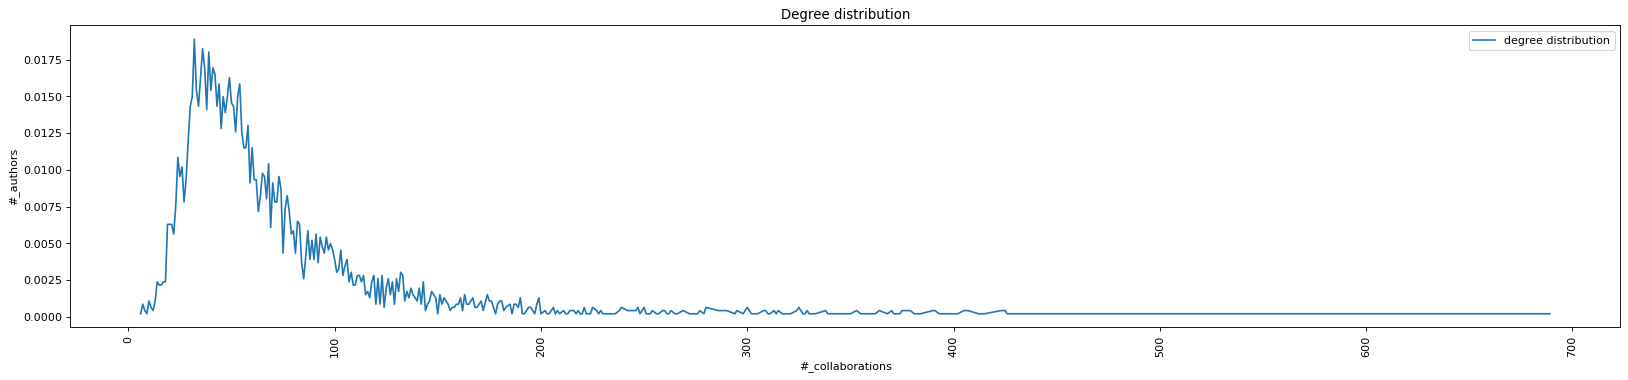

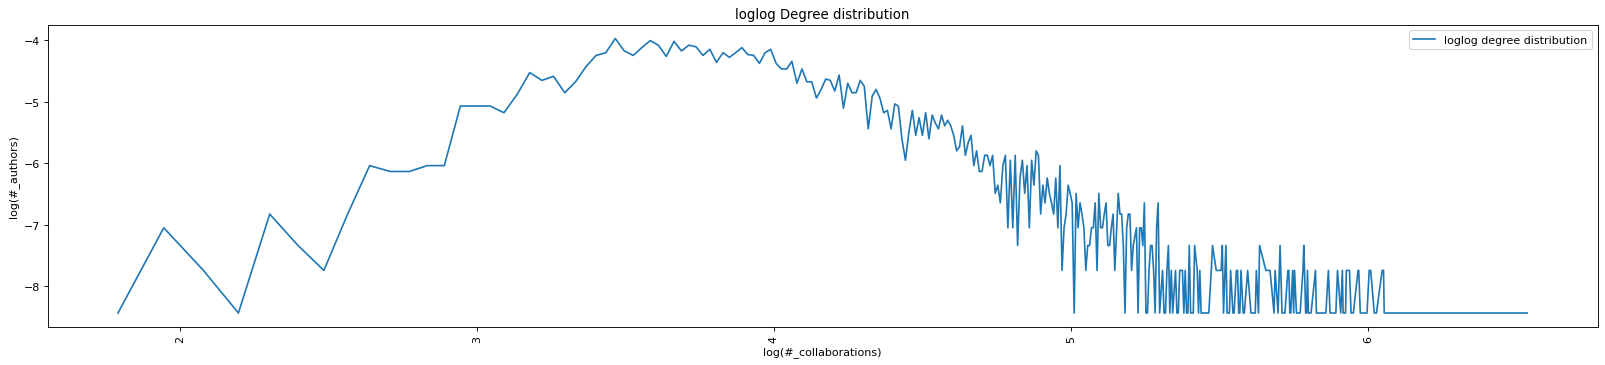

In [13]:
# DD

unique, counts = np.unique(colls, return_counts=True)
x, y = unique, counts  
y = [a / sum(y) for a in y] # normalization

draw("Degree distribution", "#_collaborations", "#_authors", x, [y], ["degree distribution"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y)], ["loglog degree distribution"], 25, 5)

# computing M_k with k>=24 to avoid the starting pike 

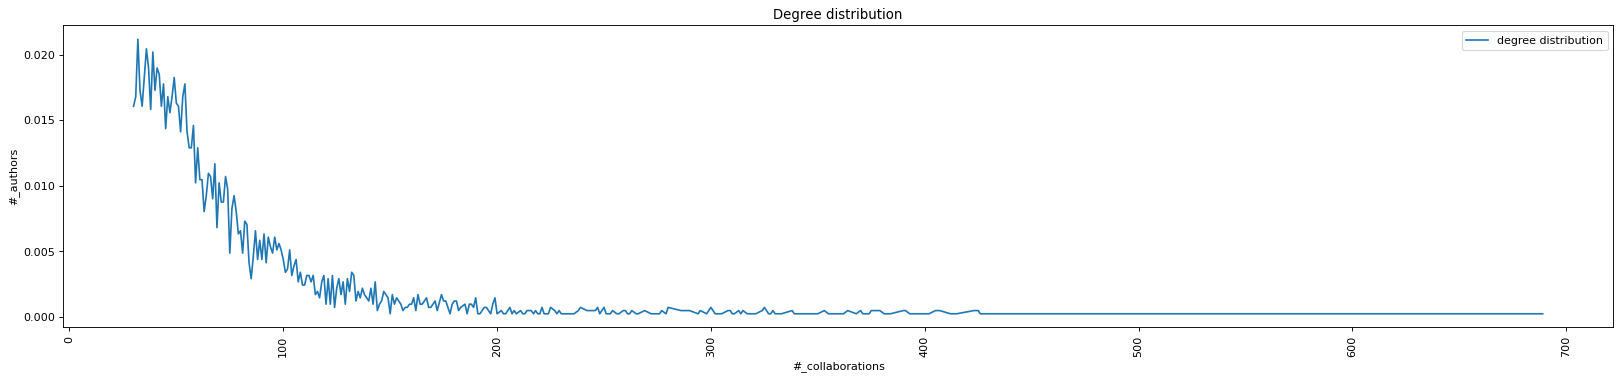

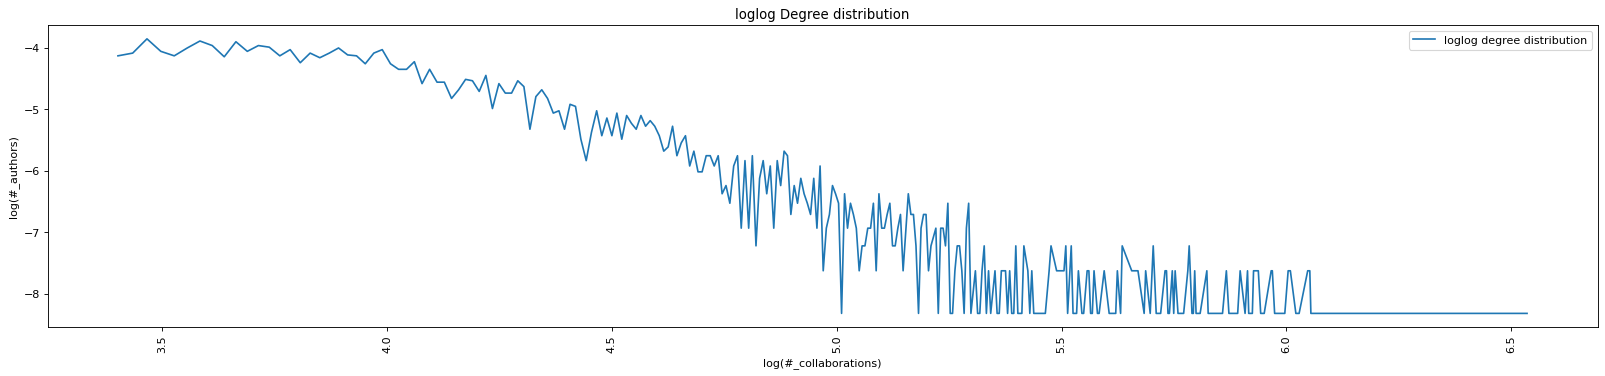

In [23]:
# DD
unique, counts = np.unique(colls, return_counts=True)
x, y = unique[24:], counts[24:]  
y = [a / sum(y) for a in y] # normalization

draw("Degree distribution", "#_collaborations", "#_authors", x, [y], ["degree distribution"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y)], ["loglog degree distribution"], 25, 5)

# Powerlaw fitting

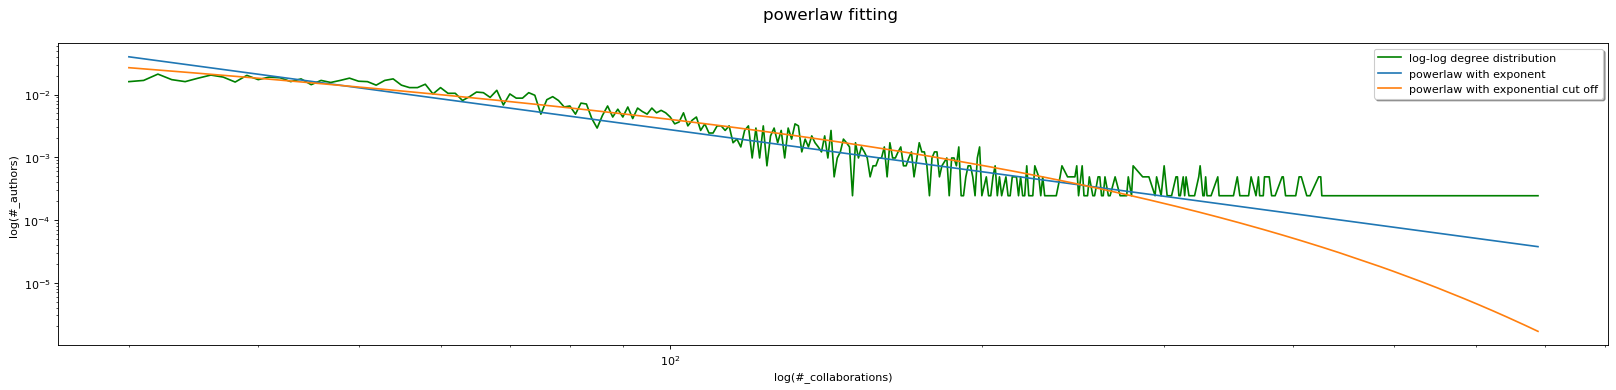

the exponent of the powerlaw is 2.224446777548903
the exponent of the exponential cutoff 1.0000087296900593
the exponential cutoff parameter is 0.00993556305139141


In [30]:
import powerlaw
xmin=30
fit = powerlaw.Fit(colls, discrete=True, xmin=xmin)

distribution = {a: b for a,b in zip(x,y)}

plt.figure(figsize=(25, 5), dpi=80)
plt.xlabel("log(#_collaborations)")
plt.ylabel("log(#_authors)")
plt.title("powerlaw fitting \n", fontdict = {'fontsize' : 15})

# Plot the observed empirical distribution.
plt.plot(distribution.keys(), distribution.values(), color='g')
# Plot the fitted power-law distribution.
fit.power_law.plot_pdf()
# Plot the fitted power-law distribution with an exponential cutoff.
fit.truncated_power_law.plot_pdf()
plt.legend(["log-log degree distribution", "powerlaw with exponent", "powerlaw with exponential cut off"], fancybox=True, shadow=True,)
plt.show()
print("the exponent of the powerlaw is", fit.power_law.alpha)
print("the exponent of the exponential cutoff", fit.truncated_power_law.parameter1)
print("the exponential cutoff parameter is", fit.truncated_power_law.parameter2)


# Exponential Fit

exp: -1.1424669789180146


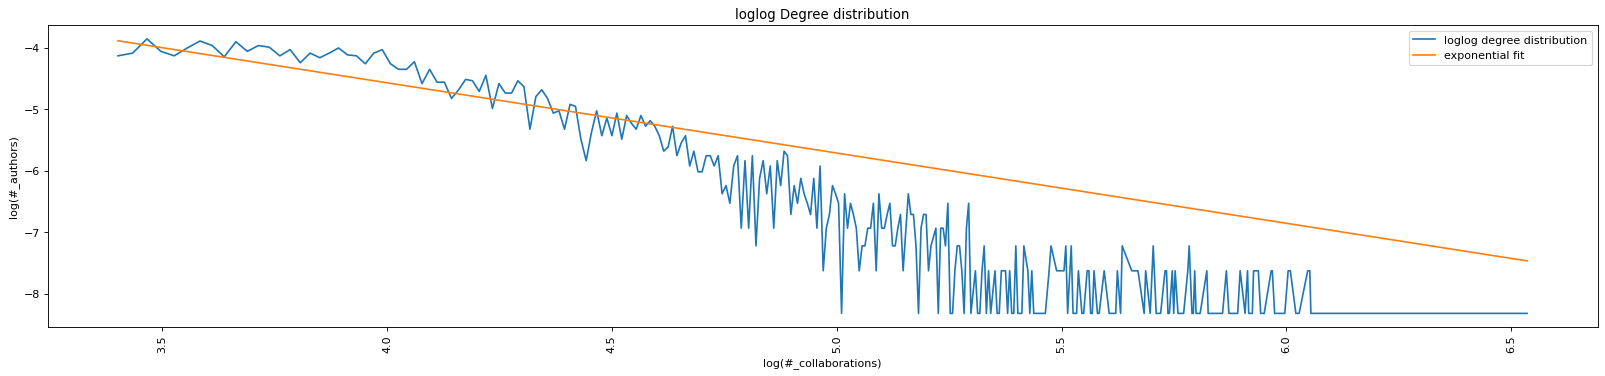

In [33]:
# powerlaw 
def exponential(x, exp):
    y = []
    for i in range(len(x)):
        y.append(pow(x[i], exp))
    return y

def fit_exponential(xdata, ydata):
    popt, pcov = curve_fit(exponential, xdata, ydata)
    exp = popt[0]

    print('exp:', exp)
    
    return exponential(xdata, exp), exp
exp_fit = fit_exponential(x, y)[0]
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y), np.log(exp_fit)], ["loglog degree distribution", "exponential fit"], 25, 5)